##### -->All the above results  for their respective columns shows that there is no missing value left in their respective columns

##### -->Preprocessed data saved to "Preprocessed_Dataset.csv" named file

## Now on we will use that "Preprocessed_Dataset.csv" to fetch the data and process our ML modal

# Task 1 Predict Restaurant Ratings

## Objective: Build a machine learning model to predict the aggregate rating of a restaurant based on other features.

##### Steps:
##### 1.Preprocess the dataset by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.
##### 2.Select a regression algorithm (e.g., linear regression, decision tree regression) and train it on the training data.
##### 3.Evaluate the model's performance using appropriate regression metrics (e.g., mean squared error, R-squared) on the testing data.
##### 4.Interpret the model's results and analyze the most influential features affecting restaurant ratings.

### -->Now we Evaluate the model's performance using appropriate regression metrics and determine a appropriate regression algorithm 

In [2]:
# step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import re


# step 2: Load the dataset
file_path = 'Preprocessed_Dataset.csv'  
df = pd.read_csv("Preprocessed_Dataset.csv")

# Convert numerical columns to numeric, forcing errors to NaN
numerical_columns = ['Average Cost for two', 'Price range', 'Votes', 'Country Code', 'Restaurant ID']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Fill numerical NaNs with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Fill categorical NaNs with 'Unknown'
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

# Step 4: Encode categorical variables
categorical_columns = ['Cuisines']  # Add more categorical columns if present
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_columns])

# Convert encoded data to DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Step 5: Combine encoded categorical and numerical data
numerical_data_df = df[numerical_columns]
features = pd.concat([encoded_categorical_df, numerical_data_df], axis=1)

# Step 6: Define target variable
target = df['Aggregate rating']

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 8: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Select and train a regression algorithm
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

# Decision Tree Regression
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)  # Decision Trees do not require scaling

# Step 10: Evaluate the model's performance
# Linear Regression Predictions
y_pred_linear = linear_regressor.predict(X_test_scaled)

# Decision Tree Predictions
y_pred_tree = tree_regressor.predict(X_test)

# Calculate regression metrics for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
adjusted_r2_linear = 1 - (1 - r2_linear) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

# Calculate regression metrics for Decision Tree Regression
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
adjusted_r2_tree = 1 - (1 - r2_tree) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("Linear Regression Metrics:")
print("Mean Squared Error (MSE):", mse_linear)
print("Root Mean Squared Error (RMSE):", rmse_linear)
print("Mean Absolute Error (MAE):", mae_linear)
print("R-squared (R²):", r2_linear)
print("Adjusted R-squared:", adjusted_r2_linear)

print("\nDecision Tree Regression Metrics:")
print("Mean Squared Error (MSE):", mse_tree)
print("Root Mean Squared Error (RMSE):", rmse_tree)
print("Mean Absolute Error (MAE):", mae_tree)
print("R-squared (R²):", r2_tree)
print("Adjusted R-squared:", adjusted_r2_tree)

# Linear Regression Coefficients
coefficients = pd.Series(linear_regressor.coef_, index=features.columns)
print("\nLinear Regression Coefficients:")
print(coefficients)

# Analyze the most influential features
influential_features = coefficients.sort_values(ascending=False)
print("\nMost Influential Features:")
print(influential_features)

# Print feature importances
feature_importances = pd.Series(tree_regressor.feature_importances_, index=X_train.columns)
print("\nDecision Tree Regression Feature Importances:")
print(feature_importances)

# Analyze the most influential features
influential_features_tree = feature_importances.sort_values(ascending=False)
print("\nMost Influential Features in Decision Tree Regression:")
print(influential_features_tree)



Linear Regression Metrics:
Mean Squared Error (MSE): 4.165572971362799e+25
Root Mean Squared Error (RMSE): 6454125015339.259
Mean Absolute Error (MAE): 1545246498134.4229
R-squared (R²): -1.8301289565208404e+25
Adjusted R-squared: -4.424742160702285e+26

Decision Tree Regression Metrics:
Mean Squared Error (MSE): 0.14452642595499737
Root Mean Squared Error (RMSE): 0.38016631354579195
Mean Absolute Error (MAE): 0.24170591313448458
R-squared (R²): 0.936502853523132
Adjusted R-squared: -0.5351841743141501

Linear Regression Coefficients:
Cuisines_Afghani                                      1.622859e+10
Cuisines_Afghani, Mughlai, Chinese                    8.115889e+09
Cuisines_Afghani, North Indian                        8.115889e+09
Cuisines_Afghani, North Indian, Pakistani, Arabian    8.115889e+09
Cuisines_African                                      8.115889e+09
                                                          ...     
Average Cost for two                                  1.4

#### -->From the above regression metrics we conclude that Decision Tree Regression approach is better for building the modal.

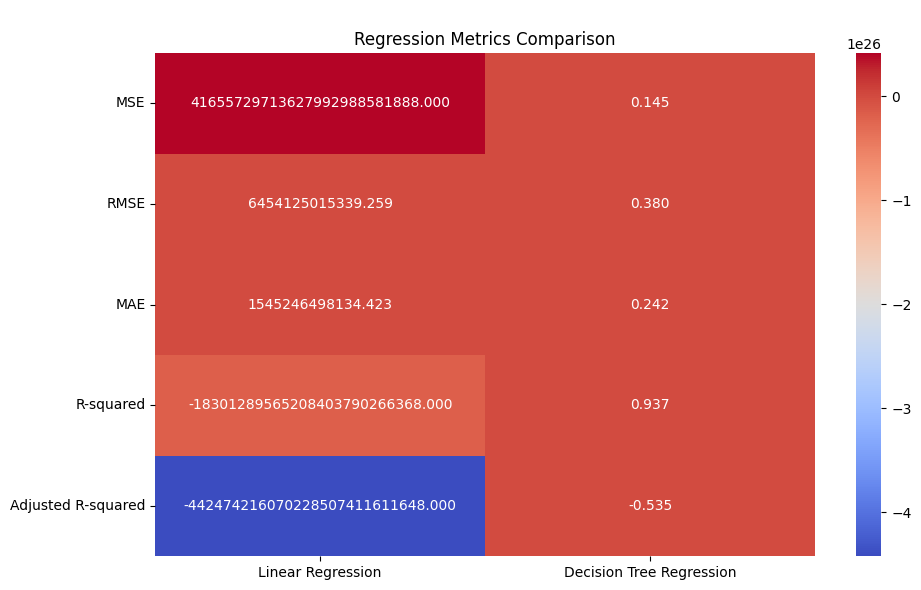

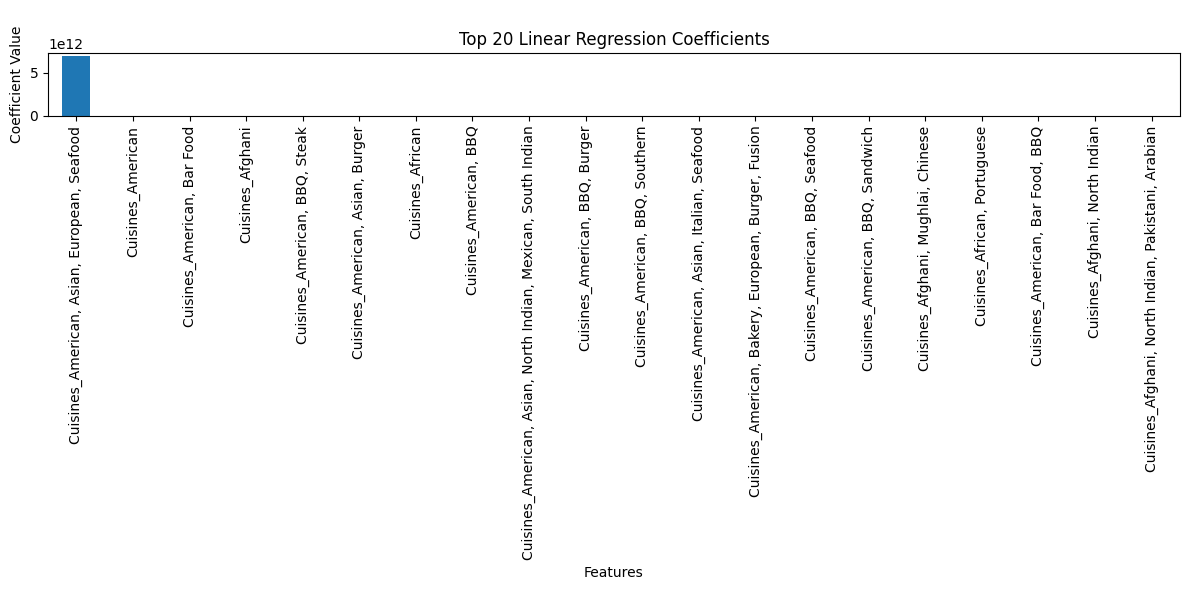

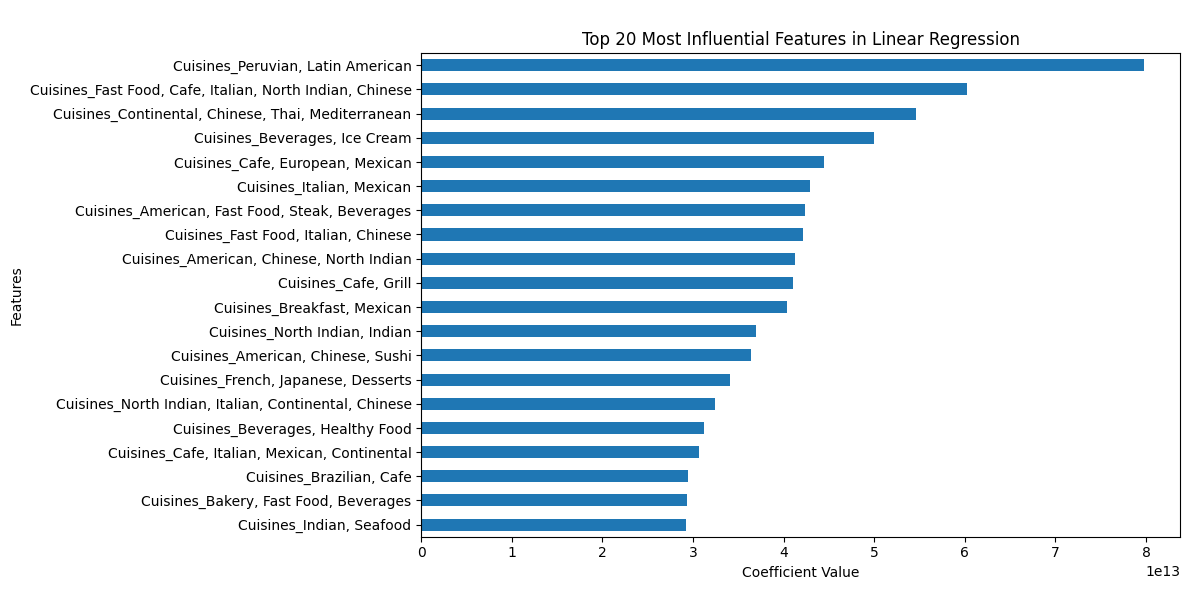

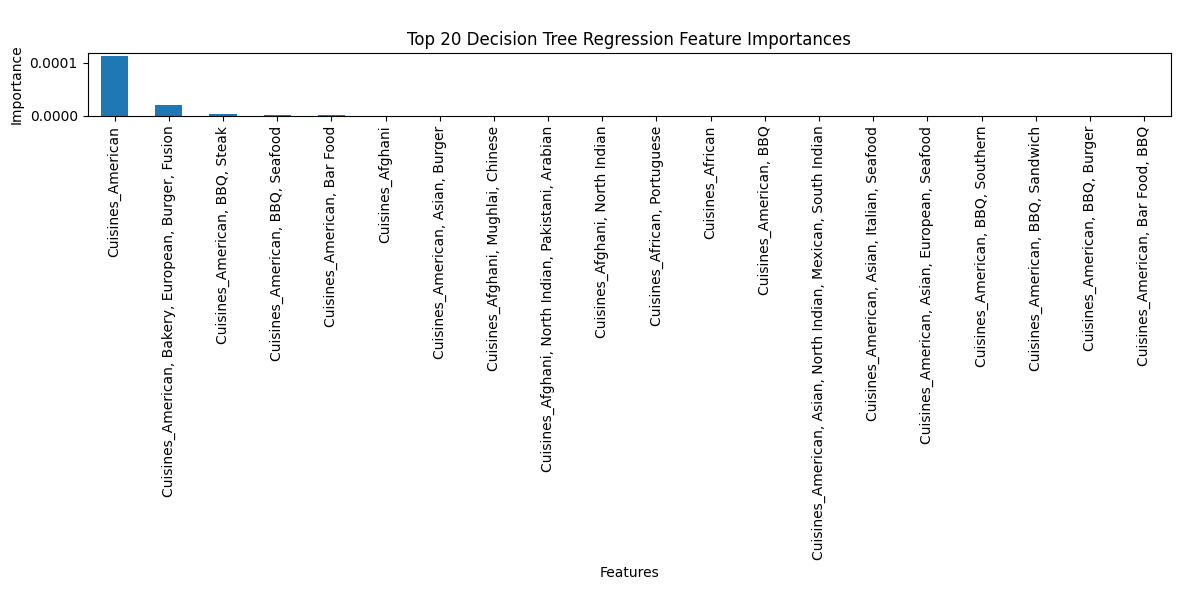

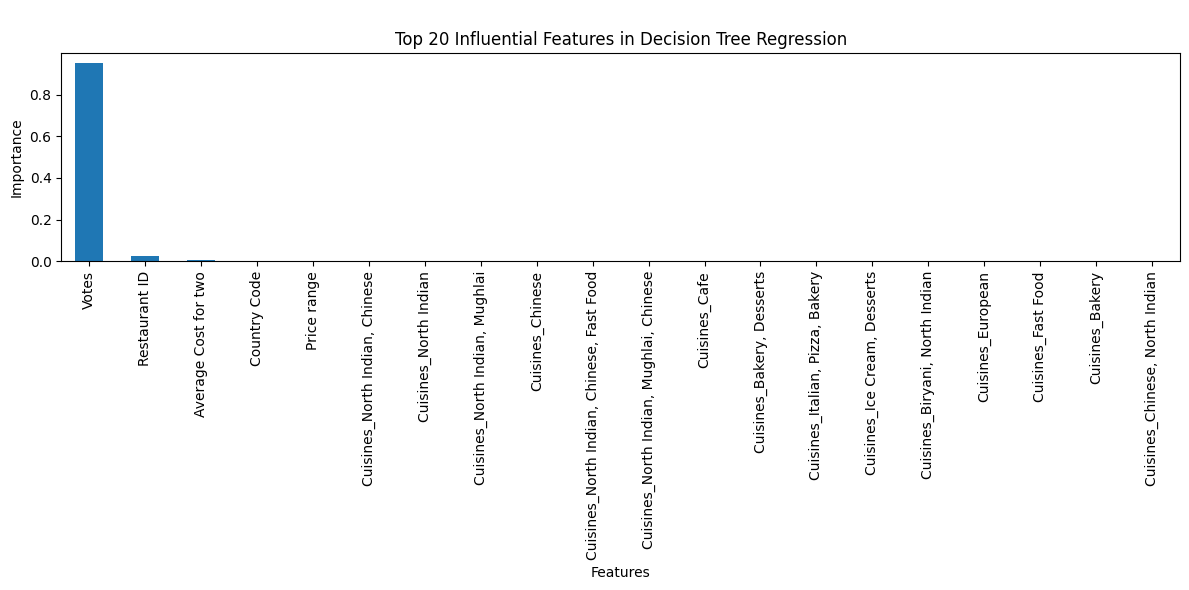

C:\Users\asah7\AppData\Local\Temp\ipykernel_26844\3403457950.py:66: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


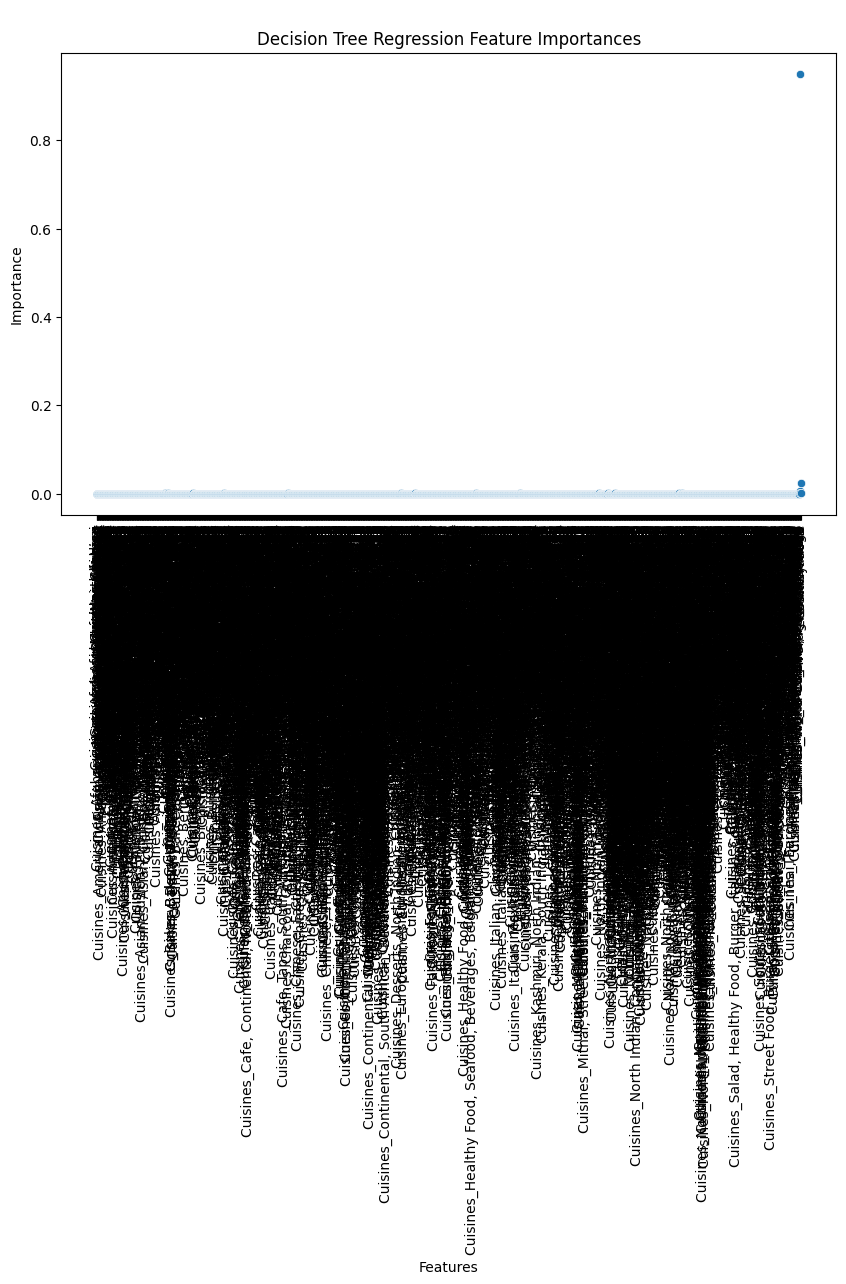

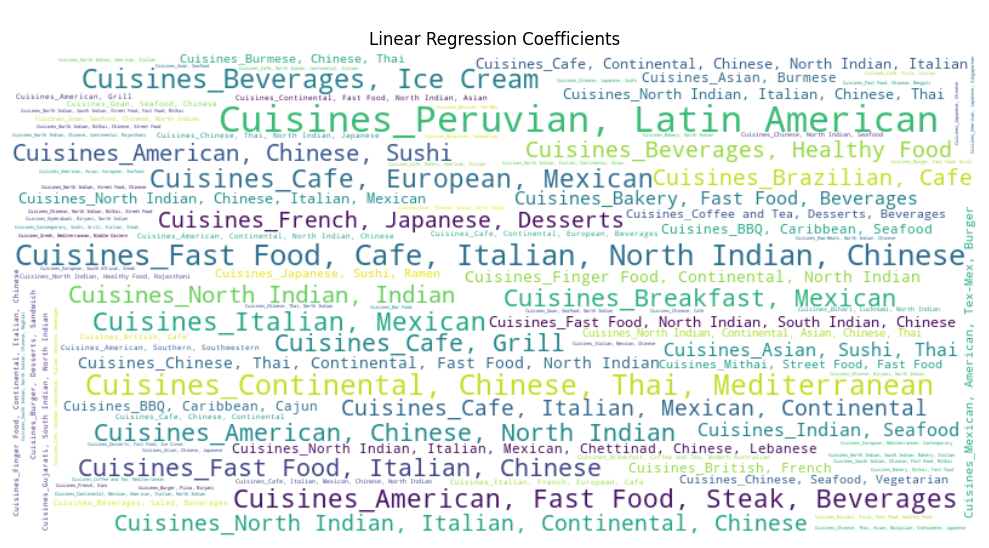

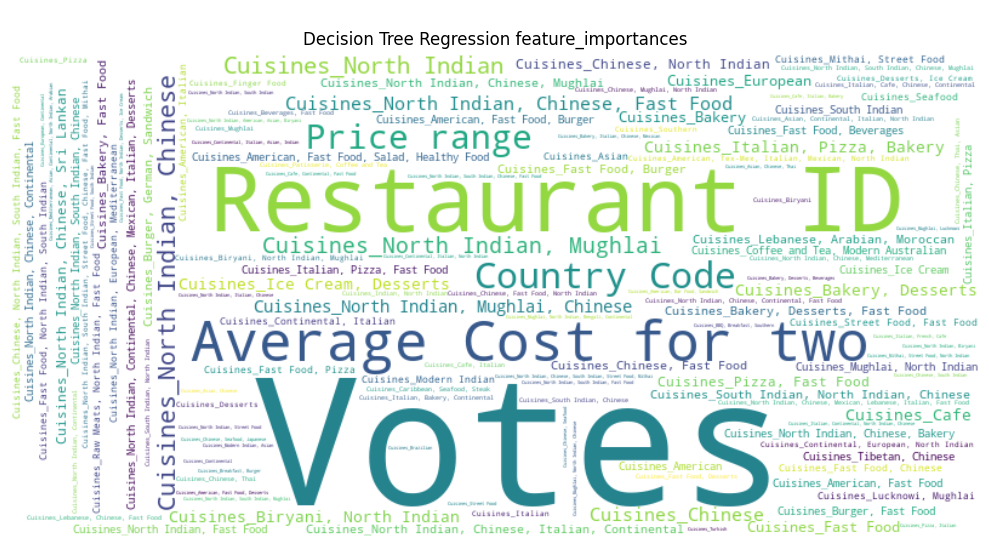

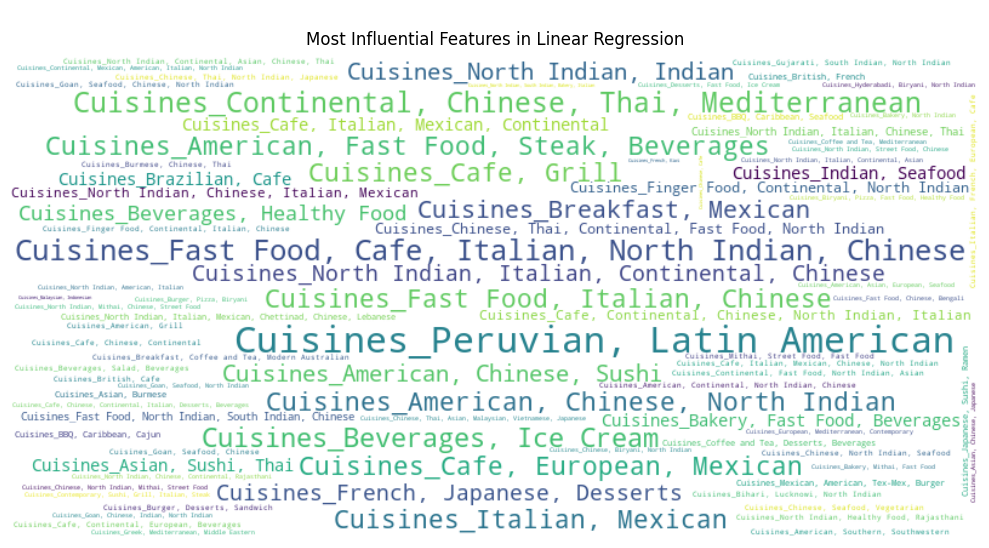

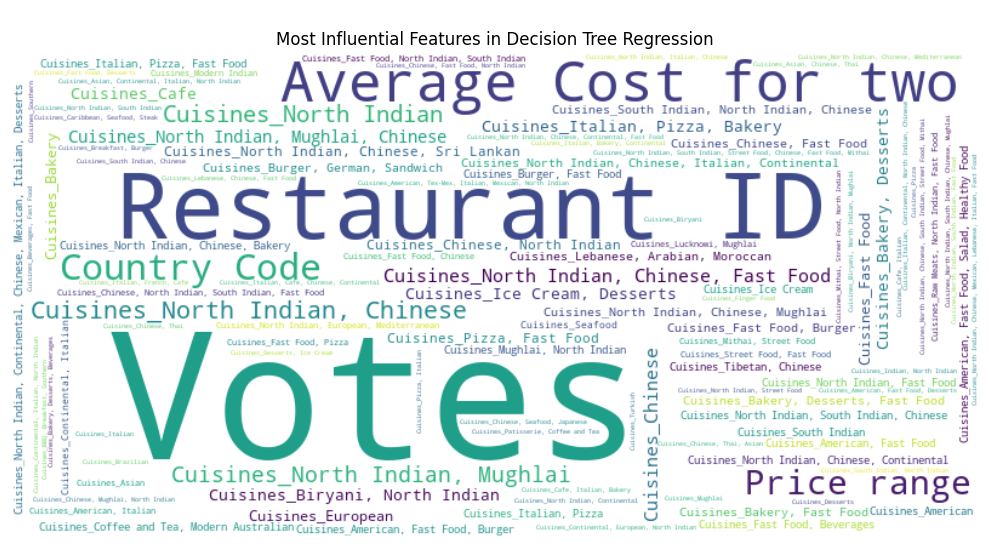

In [3]:
# Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from wordcloud import WordCloud

# Heatmap for Regression Metrics
metrics_df = pd.DataFrame({
    'Linear Regression': [mse_linear, rmse_linear, mae_linear, r2_linear, adjusted_r2_linear],
    'Decision Tree Regression': [mse_tree, rmse_tree, mae_tree, r2_tree, adjusted_r2_tree]
}, index=['MSE', 'RMSE', 'MAE', 'R-squared', 'Adjusted R-squared'])

plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('\nRegression Metrics Comparison')
plt.tight_layout()
plt.show()

# Bar Chart for Linear Regression Coefficients
plt.figure(figsize=(12, 6))
coefficients.head(20).sort_values(ascending=False).plot(kind='bar')  # Sort in descending order
plt.title('\nTop 20 Linear Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Bar Chart for Linear Regression most influential features  
plt.figure(figsize=(12, 6))
influential_features.head(20).sort_values().plot(kind='barh')  # Sort in ascending order for barh plot
plt.title('\nTop 20 Most Influential Features in Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Bar Chart for Decision Tree Regression Feature Importances
plt.figure(figsize=(12, 6))
feature_importances.head(20).sort_values(ascending=False).plot(kind='bar')
plt.title('\nTop 20 Decision Tree Regression Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Bar Chart for Decision Tree Regression the most influential features
plt.figure(figsize=(12, 6))
influential_features_tree.head(20).sort_values(ascending=False).plot(kind='bar')
plt.title('\nTop 20 Influential Features in Decision Tree Regression')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.tight_layout()
plt.show()


# Scatter Plot for Decision Tree Regression Feature Importances
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature_importances.index, y=feature_importances.values)
plt.title('\nDecision Tree Regression Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Word Cloud for Linear Regression Coefficients
wordcloud_linear = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(coefficients)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_linear, interpolation='bilinear')
plt.title('\nLinear Regression Coefficients')
plt.axis('off')
plt.tight_layout()
plt.show

# Word Cloud for feature_importances in Decision Tree Regression
wordcloud_linear = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(feature_importances)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_linear, interpolation='bilinear')
plt.title('\nDecision Tree Regression feature_importances')
plt.axis('off')
plt.tight_layout()
plt.show()
 

# Word Cloud for Most Influential Features in Linear Regression
wordcloud_linear = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(influential_features)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_linear, interpolation='bilinear')
plt.title('\nMost Influential Features in Linear Regression')
plt.axis('off')
plt.tight_layout()
plt.show()

# Word Cloud for Most Influential Features in Decision Tree Regression
wordcloud_tree = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(influential_features_tree)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_tree, interpolation='bilinear')
plt.title('\nMost Influential Features in Decision Tree Regression')
plt.axis('off')
plt.tight_layout()
plt.show()

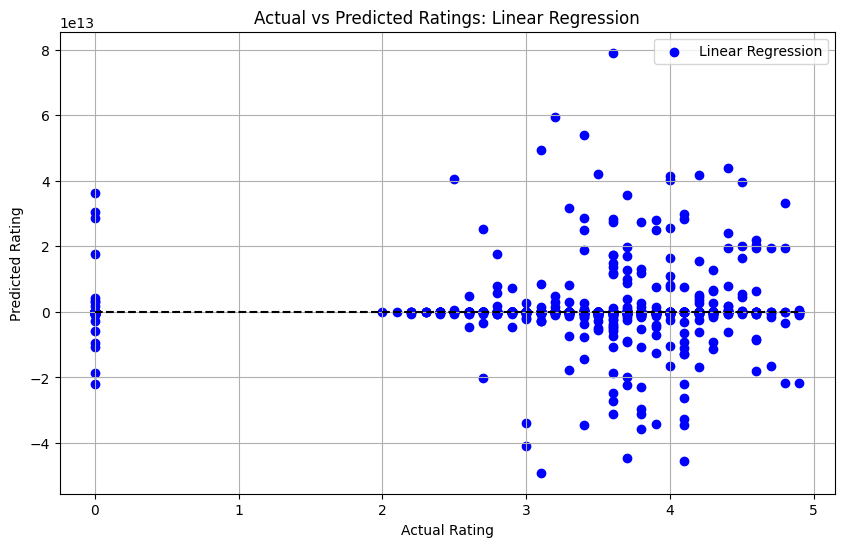

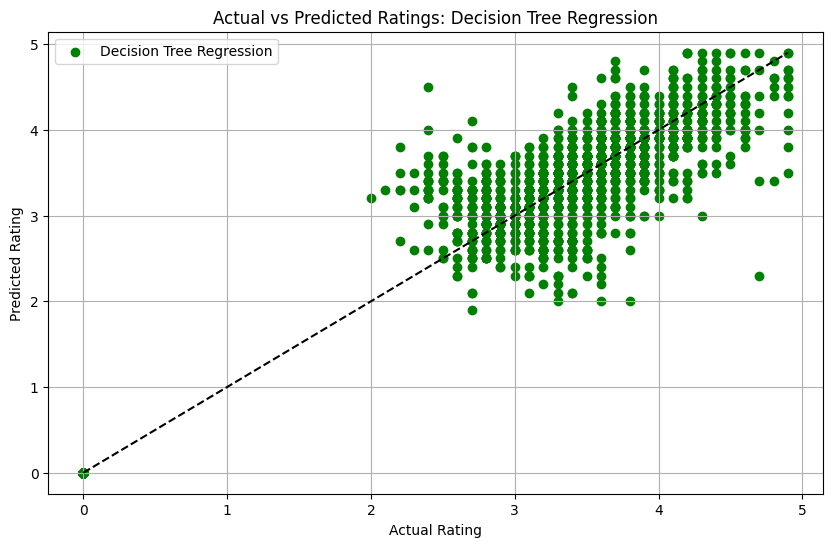

In [4]:
# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='k', linestyle='--')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings: Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for Decision Tree Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='green', label='Decision Tree Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='k', linestyle='--')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings: Decision Tree Regression')
plt.legend()
plt.grid(True)
plt.show()

### Now lets combine both Decision Tree Regression and Linear Regression and look for their regression metrics if we could get any improvement

Combined Predictions:
[ 2.73086747e+00 -5.57604216e+12  3.28035841e+00 ...  2.45546510e+00
  3.26446664e+00  3.93443114e+00]


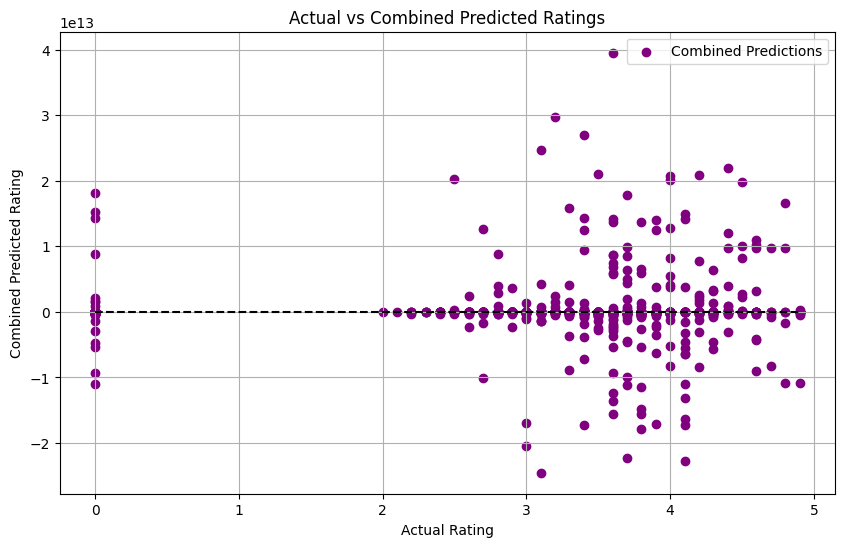


Regression Metrics for Combined Approach:
MSE: 1.0413932428407024e+25
RMSE: 3227062507669.634
MAE: 772623249067.2555
R-squared (R²): -4.5753223913021133e+24
Adjusted R-squared: -1.1061855401755742e+26


In [5]:
# Combine predictions
y_pred_combined = (y_pred_linear + y_pred_tree) / 2.0

# Print combined predictions
print("Combined Predictions:")
print(y_pred_combined)

# Scatter plot for Combined Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_combined, color='purple', label='Combined Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='k', linestyle='--')
plt.xlabel('Actual Rating')
plt.ylabel('Combined Predicted Rating')
plt.title('Actual vs Combined Predicted Ratings')
plt.legend()
plt.grid(True)
plt.show()

# Calculate regression metrics for Combined Approach
mse_combined = mean_squared_error(y_test, y_pred_combined)
rmse_combined = np.sqrt(mse_combined)
mae_combined = mean_absolute_error(y_test, y_pred_combined)
r2_combined = r2_score(y_test, y_pred_combined)
adjusted_r2_combined = 1 - (1 - r2_combined) * (len(y_test) - 1) / (len(y_test) - X_test_scaled.shape[1] - 1)

# Print regression metrics for Combined Approach
print("\nRegression Metrics for Combined Approach:")
print(f"MSE: {mse_combined}")
print(f"RMSE: {rmse_combined}")
print(f"MAE: {mae_combined}")
print(f"R-squared (R²): {r2_combined}")
print(f"Adjusted R-squared: {adjusted_r2_combined}")


# To determine which method is better for predicting the aggregate rating based on the provided metrics, let's analyze each approach:

## Linear Regression Metrics:
Mean Squared Error (MSE): Very high (4.165572971362799e+25).
Root Mean Squared Error (RMSE): Extremely high (6454125015339.259).
Mean Absolute Error (MAE): Very high (1545246498134.4229).
R-squared (R²): Very low and negative (-1.8301289565208404e+25).
Adjusted R-squared: Extremely low and negative (-4.424742160702285e+26).
## Decision Tree Regression Metrics:
Mean Squared Error (MSE): Low (0.14452642595499737).
Root Mean Squared Error (RMSE): Low (0.38016631354579195).
Mean Absolute Error (MAE): Low (0.24170591313448458).
R-squared (R²): High (0.936502853523132).
Adjusted R-squared: Negative (-0.5351841743141501), indicating potential overfitting.
## Combined Approach Metrics:
Mean Squared Error (MSE): Very high (1.0413932428407024e+25).
Root Mean Squared Error (RMSE): Extremely high (3227062507669.634).
Mean Absolute Error (MAE): Very high (772623249067.2555).
R-squared (R²): Very low and negative (-4.5753223913021133e+24).
Adjusted R-squared: Extremely low and negative (-1.1061855401755742e+26).

## Analysis and Conclusion:

    1.Linear Regression:
Performs very poorly with extremely high errors (MSE, RMSE, MAE) and very low (negative) R-squared values.
This suggests that linear regression is not suitable for this dataset or the relationship between features and target is highly non-linear.

    2.Decision Tree Regression:
Has significantly lower errors (MSE, RMSE, MAE) and a high R-squared value (0.9365), indicating a good fit.
However, the negative adjusted R-squared suggests potential overfitting, especially if the model complexity is high relative to the number of data points.

    3.Combined Approach:
Similar to linear regression, this approach has extremely high errors and very low (negative) R-squared values.
It does not improve the performance and indicates that the combination of models might not be synergistic.


#### -->Till far now Decision Tree Regression we have already trained our modal on basis of it but on further analysis and studies we can further improve our modal by using  using XGBoost regressor(Gradient Boosting Machines (GBM)).

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
import re



# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 8: Train the GBM model (XGBoost)
gbm_model = xgb.XGBRegressor(random_state=42)
gbm_model.fit(X_train, y_train)

# Predictions with GBM (XGBoost)
y_pred_gbm = gbm_model.predict(X_test)

# Calculate regression metrics for GBM (XGBoost)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
rmse_gbm = np.sqrt(mse_gbm)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
r2_gbm = r2_score(y_test, y_pred_gbm)
adjusted_r2_gbm = 1 - (1 - r2_gbm) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("\nGBM (XGBoost) Regression Metrics:")
print("Mean Squared Error (MSE):", mse_gbm)
print("Root Mean Squared Error (RMSE):", rmse_gbm)
print("Mean Absolute Error (MAE):", mae_gbm)
print("R-squared (R²):", r2_gbm)
print("Adjusted R-squared:", adjusted_r2_gbm)

# Feature Importances from GBM (XGBoost)
feature_importances_gbm = pd.Series(gbm_model.feature_importances_, index=X_train.columns)
influential_features_gbm = feature_importances_gbm.sort_values(ascending=False)

# Bar Chart for Feature Importances in GBM (XGBoost)
plt.figure(figsize=(12, 6))
influential_features_gbm.head(20).sort_values().plot(kind='barh')  # Sort in ascending order for barh plot
plt.title('Top 20 Feature Importances in GBM (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Word Cloud for Feature Importances in GBM (XGBoost)
wordcloud_gbm = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(feature_importances_gbm)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_gbm, interpolation='bilinear')
plt.title('Feature Importances in GBM (XGBoost)')
plt.axis('off')
plt.tight_layout()
plt.show()

# Scatter Plot for Feature Importances in GBM (XGBoost)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature_importances_gbm.index, y=feature_importances_gbm.values)
plt.title('Feature Importances in GBM (XGBoost)')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Scatter Plot for GBM (XGBoost)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbm, color='blue', label='GBM (XGBoost)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='k', linestyle='--')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted Ratings: GBM (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

# Train the GBM (XGBoost) model
gbm_model = xgb.XGBRegressor(random_state=42)
gbm_model.fit(X_train, y_train)

# Check if the model is trained
if hasattr(gbm_model, 'feature_importances_'):
    print("Model is trained and has feature importances.")

# Make predictions
y_pred_gbm = gbm_model.predict(X_test)

# Check if predictions are generated
if len(y_pred_gbm) > 0:
    print("Predictions generated successfully.")

# Evaluate performance metrics
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
print(f"Mean Squared Error (MSE): {mse_gbm:.4f}")

# Other metrics evaluation

# Example of how to use the model
new_data_example = X_test.iloc[0].values.reshape(1, -1)
prediction_example = gbm_model.predict(new_data_example)
print(f"Example prediction: {prediction_example}")




NameError: name 'xgb' is not defined

In [ ]:
# Print all the influential features
print("All Influential Features in XGBoost Regressor (GBM):")
print(influential_features_gbm)


In [ ]:
# Print the top 20 most influential features
print("Conclusion:-")
print("\nTop 20 Most Influential Features in XGBoost Regressor (GBM):")
print(influential_features_gbm.head(20))


## Conclusion:-
### According to various graph and table we can conclude that most influential features affecting restaurant ratings.

In [ ]:
# Example new data point (replace with actual values)
new_data_point = pd.DataFrame({
    'Average Cost for two': [1100],  # Example numerical feature
    'Price range': [3],            # Example numerical feature
    'Votes': [314],                # Example numerical feature
    'Country Code': [162],           # Example numerical feature
    'Restaurant ID': [6317637],      # Example numerical feature
    'Cuisines': ['French, Japanese, Desserts']          # Example categorical feature (encoded appropriately)
})

# Encode categorical variables (if needed) and concatenate with numerical features
encoded_new_data_point = encoder.transform(new_data_point[['Cuisines']])
encoded_new_data_point_df = pd.DataFrame(encoded_new_data_point, columns=encoder.get_feature_names_out(['Cuisines']))
new_data_point_encoded = pd.concat([encoded_new_data_point_df, new_data_point.drop(['Cuisines'], axis=1)], axis=1)

# Ensure columns match the trained model features (order and names)
new_data_point_for_prediction = new_data_point_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict using the trained model
predicted_rating = gbm_model.predict(new_data_point_for_prediction)
print(f"Predicted Aggregate Rating: {predicted_rating[0]}")


## Actual Aggregated Rating: 4.8

## Conclusion:
#### XGBoost Regressor (GBM) is the best performing model based on the provided metrics. It has the lowest prediction errors and the highest R-squared value, indicating it captures the most variance in the data and predicts aggregate ratings more accurately compared to other methods.

In [ ]:
#### --> Now take the user input and predict the rateing

In [ ]:
# Function to get user input
def get_user_input():
    user_data = {}
    
    user_data['Average Cost for two'] = float(input("\nEnter average cost for two (e.g., 500): "))
    user_data['Price range'] = int(input("\nEnter price range (e.g., 1, 2, 3, 4): "))
    user_data['Votes'] = int(input("\nEnter votes (e.g., 100): "))
    user_data['Country Code'] = int(input("\nEnter country code (e.g., 162): "))
    user_data['Restaurant ID'] = int(input("\nEnter restaurant ID (e.g., 6317637): "))
    user_data['Cuisines'] = input("\nEnter cuisines (e.g., French, Japanese, Desserts): ").lower().split(", ")

    return user_data

# Get user preferences
user_preferences = get_user_input()

# Encode categorical variables (if needed) and concatenate with numerical features
encoded_user_cuisines = np.zeros(len(encoder.categories_[0]))
for cuisine in user_preferences['Cuisines']:
    if cuisine in encoder.categories_[0]:
        encoded_user_cuisines[np.where(encoder.categories_[0] == cuisine)] = 1
encoded_user_cuisines_df = pd.DataFrame([encoded_user_cuisines], columns=encoder.get_feature_names_out(['Cuisines']))

# Prepare user data for prediction
user_preferences_encoded = pd.concat([encoded_user_cuisines_df, pd.DataFrame([user_preferences]).drop(['Cuisines'], axis=1)], axis=1)

# Ensure columns match the trained model features (order and names)
user_preferences_for_prediction = user_preferences_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict using the trained model
predicted_rating = gbm_model.predict(user_preferences_for_prediction)
print(f"\nPredicted Aggregate Rating: {predicted_rating[0]}")



##### And the Actual rating is 4.8

##### In the above we have taken those influential features affecting restaurant ratings as our parameter on which through XGBoost Regressor (GBM) modal is taking input from user and  our prediction is taking place

## Here our task 1 is completes